# Exercise 4.10

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\Python Fundamentals for Data Analysts 4\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Tim\\Desktop\\Data Analytics Intro\\Python Fundamentals for Data Analysts 4\\Instacart Basket Analysis'

In [4]:
instacart_project = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

In [6]:
instacart_project.shape

(32434212, 33)

In [6]:
instacart_project.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


# 2. Consider any security implications that might exist for this new data.

In [7]:
# Display all column headers in the Instacart dataframe
instacart_project.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'marital_status', 'income', '_merge'],
      dtype='object')

In [8]:
# Drop first name and surname columns due to PII
instacart_project.drop(['first_name', 'surname'], axis = 1, inplace = True)

In [9]:
# Validate updated columns were first_name and surname were dropped from the dataset
instacart_project.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_status', 'income', '_merge'],
      dtype='object')

# 3. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [10]:
# Create Northeast region organized by state
northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ]

In [11]:
# Create Midwest region by state
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [12]:
# Create South region by state
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [13]:
# Create West region by state
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [14]:
# Create a column called region using the regions created above
instacart_project.loc[instacart_project['state'].isin(northeast_region), 'region'] = 'northeast'

In [15]:
instacart_project.loc[instacart_project['state'].isin(midwest_region), 'region'] = 'midwest'

In [16]:
instacart_project.loc[instacart_project['state'].isin(south_region), 'region'] = 'south'

In [17]:
instacart_project.loc[instacart_project['state'].isin(west_region), 'region'] = 'west'

In [18]:
# Validating the length of the new column
len(instacart_project['region'])

32434212

In [19]:
# Validate the values in the region column
instacart_project['region'].value_counts(dropna = False)

region
south        10801610
west          8300445
midwest       7603810
northeast     5728347
Name: count, dtype: int64

In [20]:
# Determine if there is a difference in spending habits between different regions
region_spending_crosstab = pd.crosstab(instacart_project['region'], instacart_project['spending_flag'], dropna = False)

In [21]:
# View crosstab created
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
midwest,156129,7447681
northeast,108343,5620004
south,210182,10591428
west,160807,8139638


The region with the highest number of spenders by customers is the south which is followed by the west. The northeast, however, has the lower number of spenders by customers but with south recorded the higher number of customers in the category of a lower spender.  

# 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [22]:
# Create a column called exclusion_flag and create a flag to exclude users with fewer than 5 orders
instacart_project.loc[instacart_project['max_order'] < 5, 'exclusion_flag'] = 'exclude'

In [23]:
# Create a flag to keep users with orders greater than or equal to 5 orders
instacart_project.loc[instacart_project['max_order'] >= 5, 'exclusion_flag'] = 'include'

In [24]:
# Validate column was created and populated successfully
instacart_project.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include


In [25]:
# Validate frequency counts of the new column
instacart_project['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
include    30992664
exclude     1441548
Name: count, dtype: int64

In [26]:
# Create a crosstab to validate the data in Excel
exclusion_flag_check = pd.crosstab(instacart_project['exclusion_flag'], instacart_project['max_order'], dropna = False)

In [27]:
# Copy the crosstab data to the clipboard to be able to paste in Excel
exclusion_flag_check.to_clipboard()

In [28]:
# Create a sample of the dataframe removing the excluded rows
instacart_project = instacart_project[instacart_project['exclusion_flag'] == 'include']

In [29]:
instacart_project.shape

(30992664, 33)

The number of rows in the instacart_project is the same as the number of rows after the validation process. The dataframe includes those of customers that have less or more orders on instacart. 

# Export the sample.

In [30]:
# Export Sample
instacart_project.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_project_sample.pkl'))

# 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

# 5.1 Age variable

In [ ]:
# The age categories are classfied as following.
Young adult =< 25,  Adult 25-45,Older Adult 45-65  Senior 65+
#Creating age profiling variable

In [13]:
instacart_project.loc[instacart_project['age']<=25, 'age_group']='young_adult'

In [14]:
instacart_project.loc[(instacart_project['age']>25)&(instacart_project['age']<45), 'age_group']='adult'

In [15]:
instacart_project.loc[(instacart_project['age']>=45)&(instacart_project['age']<65), 'age_group']='older_adult'

In [16]:
# Create old range for ages 65 years + 
instacart_project.loc[instacart_project['age']>=65, 'age_group']='senior'

In [17]:
# Validate the age categories if created successfully and the frequency counts of each
instacart_project['age_group'].value_counts(dropna = False)

age_group
older_adult    10149279
adult           9653287
senior          8582637
young_adult     4049009
Name: count, dtype: int64

In [18]:
instacart_project.dropna()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,senior
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,senior
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,senior
5,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434206,49235,Organic Half & Half,53,16,1.8,1677669,80734,2,2,8,...,Bowers,Male,Alabama,45,9/28/2019,1,married,41072,both,older_adult
32434207,49235,Organic Half & Half,53,16,1.8,2542346,80734,3,3,8,...,Bowers,Male,Alabama,45,9/28/2019,1,married,41072,both,older_adult
32434209,49520,Orange Sparkling Water,115,7,7.5,2008002,74506,2,0,15,...,Coffey,Male,Vermont,44,4/16/2018,3,married,97209,both,adult
32434210,49520,Orange Sparkling Water,115,7,7.5,1595973,74506,3,1,17,...,Coffey,Male,Vermont,44,4/16/2018,3,married,97209,both,adult


In [39]:
# Aggregate age category frequency
instacart_project.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
adult                    10.815224  0.0  30.0
older_adult              10.825736  0.0  30.0
senior                   10.792184  0.0  30.0
young_adult              10.799042  0.0  30.0

In [40]:
# Aggregate age category by prices
instacart_project.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
adult        11.787489  1.0  99999.0
older_adult  12.112826  1.0  99999.0
senior       11.758945  1.0  99999.0
young_adult  12.210014  1.0  99999.0

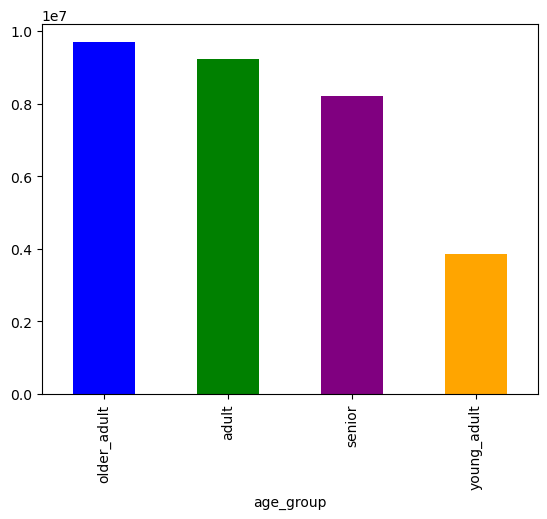

In [41]:
# Create bar chart for age categories
bar=instacart_project['age_group'].value_counts().plot.bar(color =['blue', 'green', 'purple','orange'])

In [42]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'bar_agegroup.png'), bbox_inches='tight')

# 5.2 Income variable

Create a new column called income categories for low income less than or equal to 50,000 and less or equal to 100,000

In [43]:
instacart_project.loc[instacart_project['income'] <= 50000, 'income_group'] = 'low'

In [44]:
instacart_project.loc[(instacart_project['income'] > 50000) & (instacart_project['income'] <= 100000), 'income_group'] = 'middle'

In [45]:
instacart_project.loc[instacart_project['income'] > 100000, 'income_group'] = 'high'

In [46]:
# Validate frequency counts of new income column and ensure there are no missing values
instacart_project['income_group'].value_counts(dropna = False)

income_group
high      14219044
middle    13407471
low        3366149
Name: count, dtype: int64

In [47]:
# Aggregate income_category frequencies
instacart_project.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
income_group                                  
high                      10.769961  0.0  30.0
low                       11.175710  0.0  30.0
middle                    10.762025  0.0  30.0

In [48]:
# Aggregate income category by prices
instacart_project.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
income_group                         
high          16.458909  1.0  99999.0
low            6.713149  1.0     25.0
middle         8.447087  1.0  99999.0

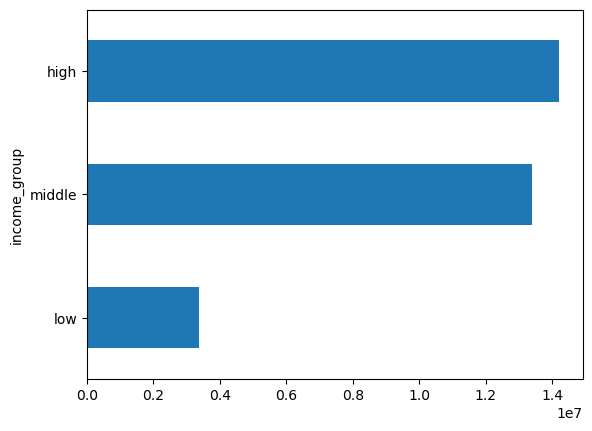

In [49]:
# Create a bar chart for income category 
bar_income_category = instacart_project['income_group'].value_counts().sort_values().plot.barh()

In [50]:
# Export Bar Chart
bar_income_category.figure.savefig(os.path.join(path, '04 Analysis', 'bar_incomegroup.png'))

# 5.3 Variable for number of dependants

In [51]:
instacart_project.loc[instacart_project['n_dependants'] > 0, 'dependants_flag'] = 'has_dependants'

In [52]:
instacart_project.loc[instacart_project['n_dependants'] == 0, 'dependants_flag'] = 'no_dependants'

In [53]:
# Validate successsful and count frequency created
instacart_project['dependants_flag'].value_counts(dropna = False)

dependants_flag
has_dependants    23245632
no_dependants      7747032
Name: count, dtype: int64

In [54]:
# Aggregate dependant frequency
instacart_project.groupby('dependants_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
dependants_flag                                  
has_dependants               10.816612  0.0  30.0
no_dependants                10.791750  0.0  30.0

In [55]:
# Aggregate for dependant prices
instacart_project.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependants_flag                         
has_dependants   11.878163  1.0  99999.0
no_dependants    12.103485  1.0  99999.0

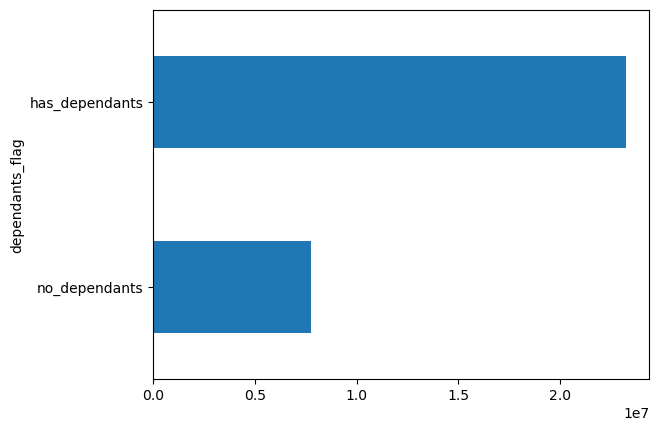

In [56]:
# Create visualization for number of dependent category profile
bar_dependant = instacart_project['dependants_flag'].value_counts().sort_values().plot.barh()

In [57]:
# Export dependant group Bar Chart
bar_dependant.figure.savefig(os.path.join(path, '04 Analysis', 'bar_dependentgroup.png'), bbox_inches='tight')

# 6. Create an appropriate visualization to show the distribution of profiles.

In [58]:
# Create a sample of data with user_id, age_group, income_group, dependants_flag, and loyalty_flag columns
user_sample = instacart_project[['user_id', 'age_group', 'income_group', 'dependants_flag', 'region', 'loyalty_flag']]

In [59]:
# Drop duplicate rows in the sample to obtain unique customers
user_sample = user_sample.drop_duplicates()

In [60]:
# Validate data
user_sample

,user_id,age_group,income_group,dependants_flag,region,loyalty_flag
0,138,senior,low,has_dependants,midwest,Regular customer
148,709,senior,high,has_dependants,northeast,New customer
398,777,older_adult,middle,has_dependants,west,Regular customer
511,825,young_adult,low,has_dependants,south,New customer
544,910,senior,low,no_dependants,south,Regular customer
...,...,...,...,...,...,...
32434123,169498,older_adult,high,has_dependants,northeast,New customer
32434137,28213,adult,high,has_dependants,south,New customer
32434155,18512,senior,middle,no_dependants,midwest,New customer
32434184,31628,adult,low,has_dependants,south,New customer


# 6.1 Age_categories in the user sample

In [61]:
# Age_category counts table created
age_group_counts = user_sample['age_group'].value_counts()

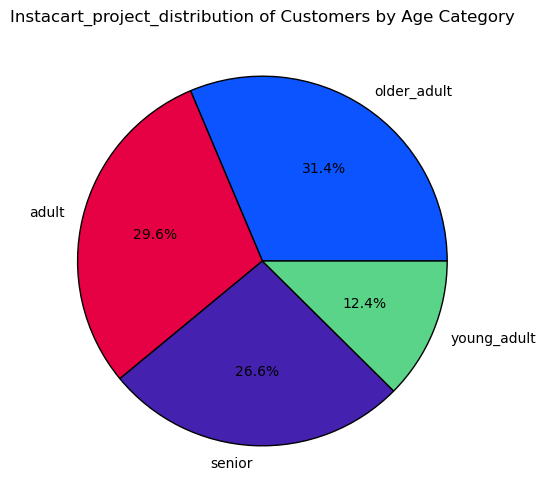

In [64]:
# Create a Pie Chart of the age_category column. Save and export to analysis folder
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_counts, 
        labels = age_group_counts.index, 
        autopct='%.1f%%', # Show percentage to one decimal point
        colors = ['#0b54ff', '#e60044', '#4421af', '#5ad489', '#d1d45a', '#ebdc74'], # Set colors using color palette
        wedgeprops = {'edgecolor' : 'black'}) # Set color of boarders
plt.title('Instacart_project_distribution of Customers by Age Category') # Set title of pie chart title
plt.savefig(os.path.join(path, '04 Analysis', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save pie chart and export to project folder
plt.show()

# 6.2 Income_categories in the user sample

In [65]:
# Create an income_category table
income_category_counts = user_sample['income_group'].value_counts()

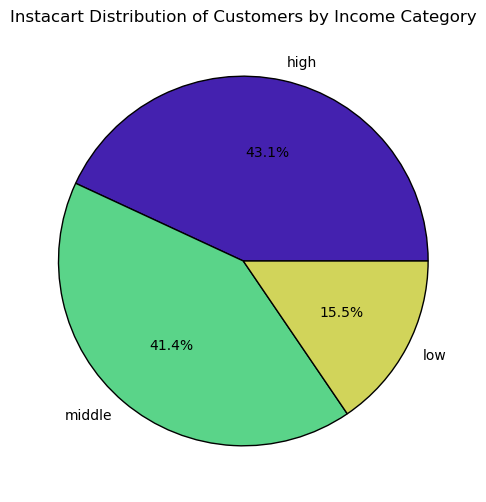

In [66]:
# Create a pie chart of income_categories, save and export it to analysis folder
plt.figure(figsize=(6, 6))           # Control size of chart
plt.pie(income_category_counts, 
        labels = income_category_counts.index, 
        autopct='%.1f%%',            # Show percentage to one decimal point
        colors = ['#4421af', '#5ad489', '#d1d45a'],   # Set colors using color palette
        wedgeprops = {'edgecolor' : 'black'})       # Set color of boarders
plt.title('Instacart Distribution of Customers by Income Category')      # Set title of pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'customers_income_Categories_pie.png'), bbox_inches = 'tight')   # Save pie chart and export to project folder
plt.show()

# 6.3 Dependant status in the user sample

In [67]:
# create a table of dependents_flag counts
dependants_flag_counts = user_sample['dependants_flag'].value_counts()

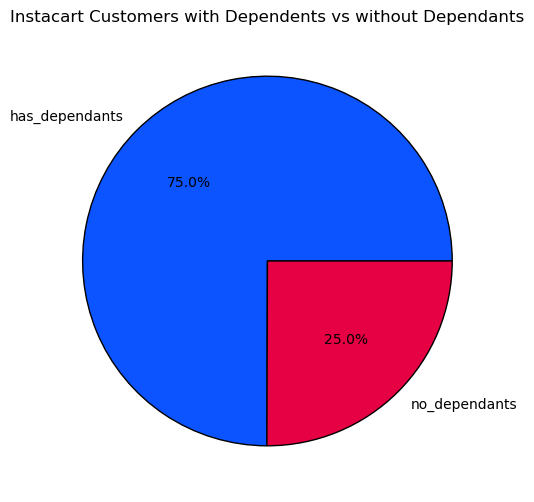

In [68]:
# Create a pie chart of dependant status. Save and export to analysis folder
plt.figure(figsize=(6, 6))           # Set size of pie chart
plt.pie(dependants_flag_counts, 
        labels = dependants_flag_counts.index, 
        autopct='%.1f%%',         # Show percentage to one decimal point
        colors = ['#0b54ff', '#e60044'],       # Set colors using color palette
        wedgeprops = {'edgecolor' : 'black'})  # Set color of boarders of pie chart
plt.title('Instacart Customers with Dependents vs without Dependants')   # Set title of pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'customers_dependants_pie.png'), bbox_inches = 'tight')  # Save and export pie chart
plt.show()

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [69]:
# Create an aggregated subset of order data using sum of the prices column as the total cost of each order:
orders_subset = instacart_project.groupby(['user_id', 'age_group', 'income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [70]:
# Change prices column to order_total to reflect the aggregation done in prior step
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [71]:
# Validate data subset and column renaming
orders_subset

,user_id,age_group,income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,order_total
0,1,adult,low,has_dependants,New customer,south,2,15.0,35.4
1,1,adult,low,has_dependants,New customer,south,3,21.0,28.2
2,1,adult,low,has_dependants,New customer,south,4,29.0,26.0
3,1,adult,low,has_dependants,New customer,south,5,28.0,57.0
4,1,adult,low,has_dependants,New customer,south,6,19.0,25.0
...,...,...,...,...,...,...,...,...,...
2901909,99999,adult,middle,has_dependants,Regular customer,northeast,30,4.0,6.7
2901910,99999,adult,middle,has_dependants,Regular customer,northeast,31,8.0,25.1
2901911,99999,adult,middle,has_dependants,Regular customer,northeast,32,5.0,44.4
2901912,99999,adult,middle,has_dependants,Regular customer,northeast,33,6.0,41.2


# Age_category aggregated

In [72]:
# Subset of data by age_category created to calculate the max, min, and mean
age_cat_agg = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'order_total' : ['min', 'mean', 'max']})

In [73]:
# Validate age_category subset
age_cat_agg

days_since_prior_order                  order_total              \
                               min       mean   max         min        mean   
age_group                                                                     
adult                          0.0  10.403811  30.0         1.0  119.417752   
older_adult                    0.0  10.382388  30.0         1.0  122.629599   
senior                         0.0  10.372133  30.0         1.0  118.012995   
young_adult                    0.0  10.380445  30.0         1.0  123.835847   

                       
                  max  
age_group              
adult        100384.5  
older_adult  100452.9  
senior       100330.2  
young_adult  100265.6

Above table show all age categories spent the same range of amount on order transalated into frequency order. 

# Income_category aggregated

In [74]:
income_cat_agg = orders_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],'order_total' : ['min', 'mean', 'max']})

In [75]:
income_cat_agg

days_since_prior_order                  order_total              \
                                min       mean   max         min        mean   
income_group                                                                   
high                            0.0  10.261082  30.0         1.0  173.435955   
low                             0.0  11.070340  30.0         1.0   52.770928   
middle                          0.0  10.290050  30.0         1.0   87.769840   

                        
                   max  
income_group            
high          100452.9  
low              875.0  
middle        100264.7

Lower custormers make lower order therefore translated into lower spending. 

# Dependants aggregated

In [76]:
dependants_cat_agg = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],'order_total' : ['min', 'mean', 'max']})

In [77]:
dependants_cat_agg

days_since_prior_order                  order_total  \
                                   min       mean   max         min   
dependants_flag                                                       
has_dependants                     0.0  10.388301  30.0         1.0   
no_dependants                      0.0  10.378189  30.0         1.0   

                                       
                       mean       max  
dependants_flag                        
has_dependants   120.137975  100452.9  
no_dependants    121.984434  100384.5

The number of days since the customer's last order or the total amount spent does not seem to differ significantly depending on whether the customer has dependents. 

# 8. Compare customer profiles with regions and departments and identify any link between them.

# 8.1. Customers by Region

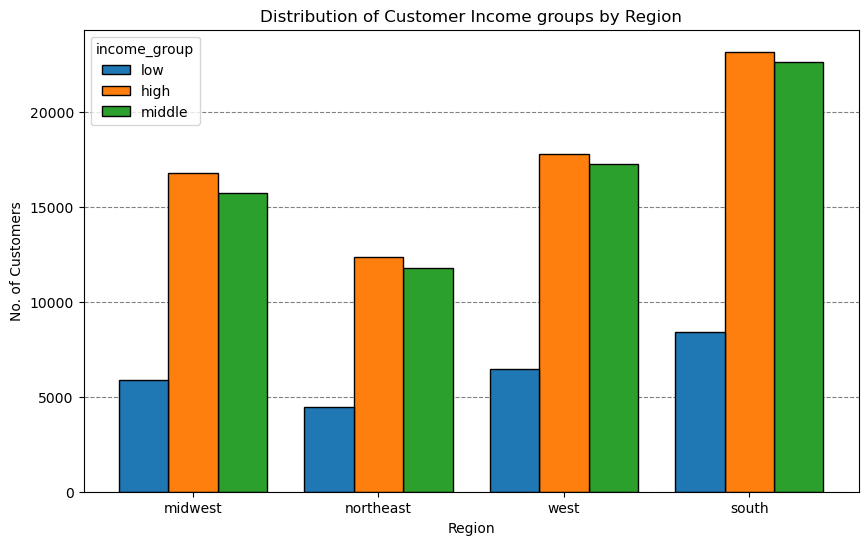

In [78]:
# Create a histogram to show the counts of customers in each income group by region
plt.figure(figsize=(10, 6))
sns.histplot(data=user_sample, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Customer Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'instacart_project_income_by_region.png'), bbox_inches = 'tight')
plt.show()

# 8.2 Age categories by Region

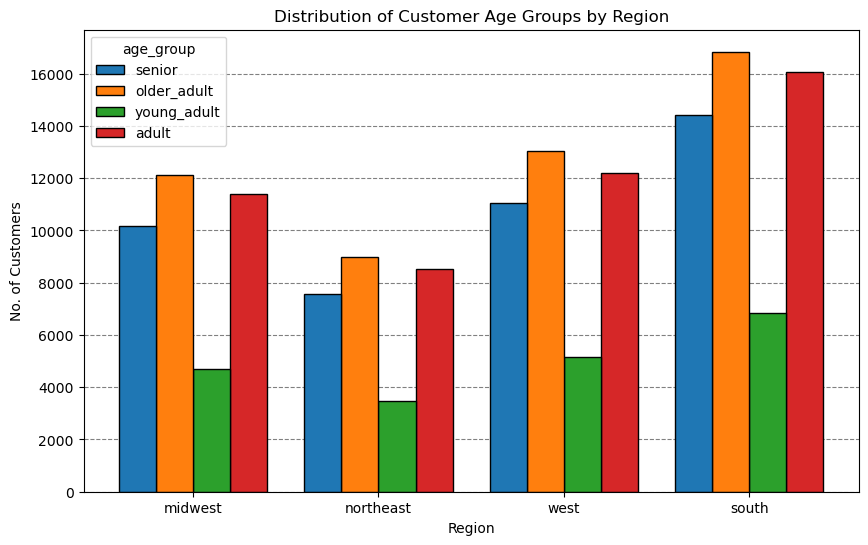

In [79]:
# Create a histogram showing counts of age_category by region
plt.figure(figsize=(10, 6))
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'instacart_project_age_by_region.png'), bbox_inches = 'tight') 
plt.show()

# 8.3 Department by Region

Import the departments_wrangled csv file into the notebook

In [80]:
dept_category = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [107]:
dept_category

,department_id,department_x,department_y,merge indicator
0,1,frozen,frozen,both
1,2,other,other,both
2,3,bakery,bakery,both
3,4,produce,produce,both
4,5,alcohol,alcohol,both
5,6,international,international,both
6,7,beverages,beverages,both
7,8,pets,pets,both
8,9,dry goods pasta,dry goods pasta,both
9,10,bulk,bulk,both


In [108]:
# Convert the df_dept dataframe into a data dictionary
zipped=zip(dept_category['department_id'], dept_category['department_x'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [109]:
instacart_project['department_x'] = instacart_project['department_id'].map(data_dict)

In [110]:
instacart_project.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,marital_status,income,_merge,region,exclusion_flag,age_group,income_group,dependants_flag,department,department_x
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,both,midwest,include,senior,low,has_dependants,NaN,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,both,midwest,include,senior,low,has_dependants,NaN,snacks
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,married,49620,both,midwest,include,senior,low,has_dependants,NaN,meat seafood
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,married,49620,both,midwest,include,senior,low,has_dependants,NaN,meat seafood
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,married,49620,both,midwest,include,senior,low,has_dependants,NaN,bulk


In [111]:
# Create a crosstab containing the department and region
region_dept = pd.crosstab(instacart_project['department_x'], instacart_project['region'], dropna = False)

In [112]:
region_dept

region,midwest,northeast,south,west
department_x,,,,
alcohol,34052,25034,48822,36766
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157781,119327,225539,175448
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


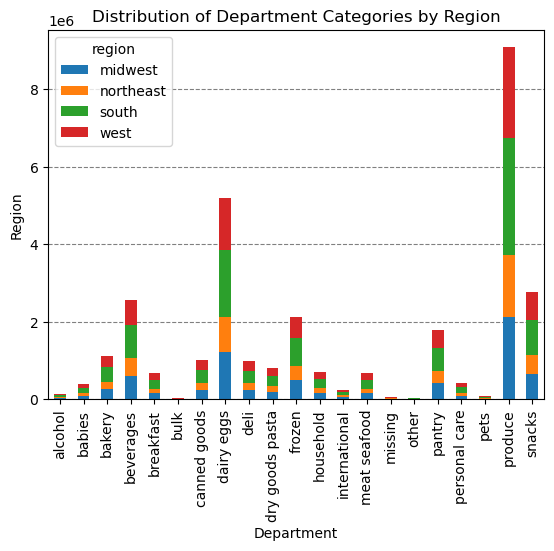

In [114]:
# Create a bar chart using region and department
# Save and export the bar chart
bar4 = region_dept.plot(kind='bar', stacked =True)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Department Categories by Region')
plt.ylabel('Region')
plt.xlabel('Department')
bar4.figure.savefig(os.path.join(path, '04 Analysis', 'bar_region_department.png'),bbox_inches='tight') 

# 8.4 Dependants by region

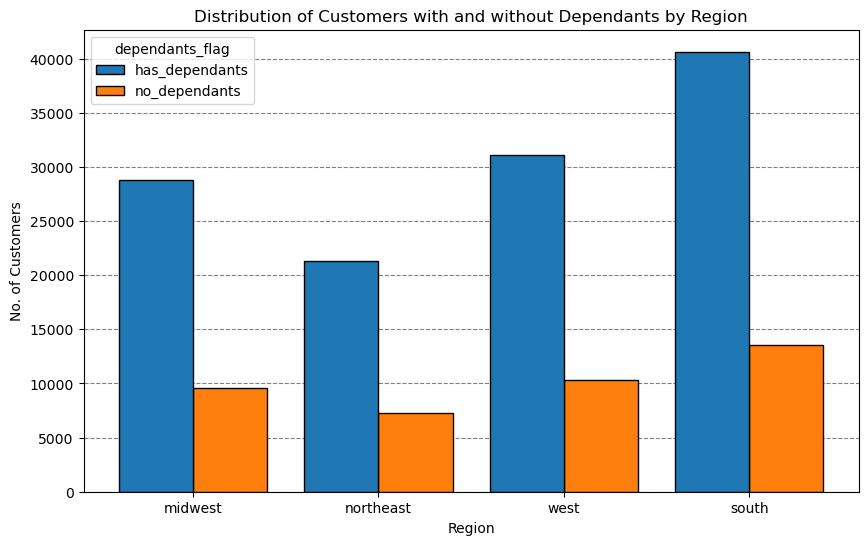

In [115]:
# Create a histogram using the dependants_flag and region columns
plt.figure(figsize=(10, 6))
sns.histplot(data=user_sample, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Customers with and without Dependants by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'instacart_dependants_by_region.png'), bbox_inches = 'tight')
plt.show()

# 8.5 Price range by region

In [116]:
# Create a crosstab containing region and price range
region_price_range = pd.crosstab(instacart_project['region'], instacart_project['price_range_loc'], dropna = False)

In [117]:
# Validate crosstab
region_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
midwest,93281,2267099,4907327
northeast,69733,1712373,3687962
south,132663,3217518,6970281
west,102280,2477910,5354237


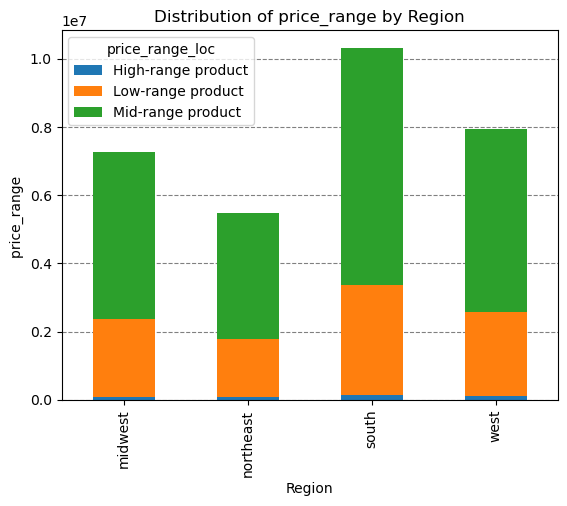

In [118]:
# Create a bar chart using the region_price_range data
bar6 = region_price_range.plot(kind='bar', stacked =True)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of price_range by Region')
plt.ylabel('price_range ')
plt.xlabel('Region')
bar6.figure.savefig(os.path.join(path, '04 Analysis', 'bar_region_pricerange.png'), bbox_inches='tight')

# 8.6 Creating profiles by department sales

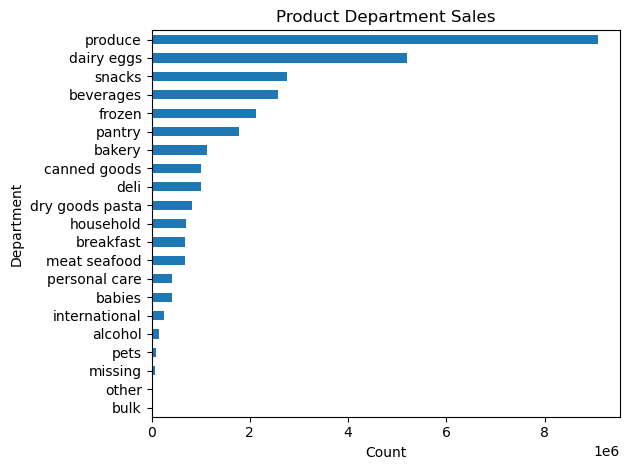

In [119]:
# Creating department sales bar chart
dept_bar=instacart_project['department_x'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [120]:
# Exporting Department Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','department_product_bar.png'))

# 8.7 Profile of department sales by age groups

In [122]:
age_department_comparison=pd.crosstab(instacart_project['age_group'],instacart_project['department_x'],dropna=False)

<Figure size 2500x2500 with 0 Axes>

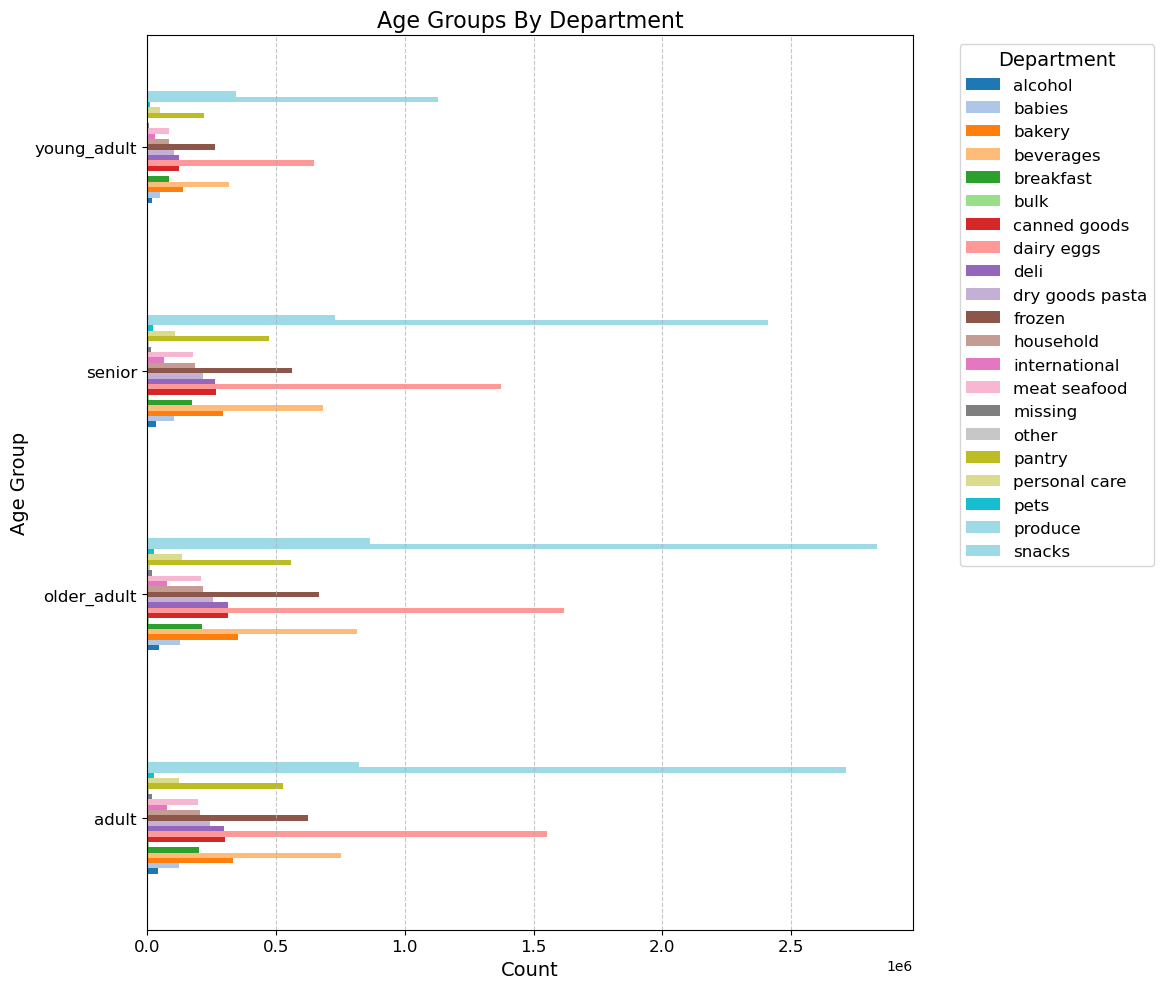

In [123]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [124]:
# Exporting Age Group by Department Bar Chart
age_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','age_department_comparison_bar.png'))

# 8.8 Profile of department sales by income group

In [125]:
# Creating crosstab to compare income_group profile with departments
income_group_department_comparison=pd.crosstab(instacart_project['income_group'],instacart_project['department_x'],dropna=False)

<Figure size 1800x1200 with 0 Axes>

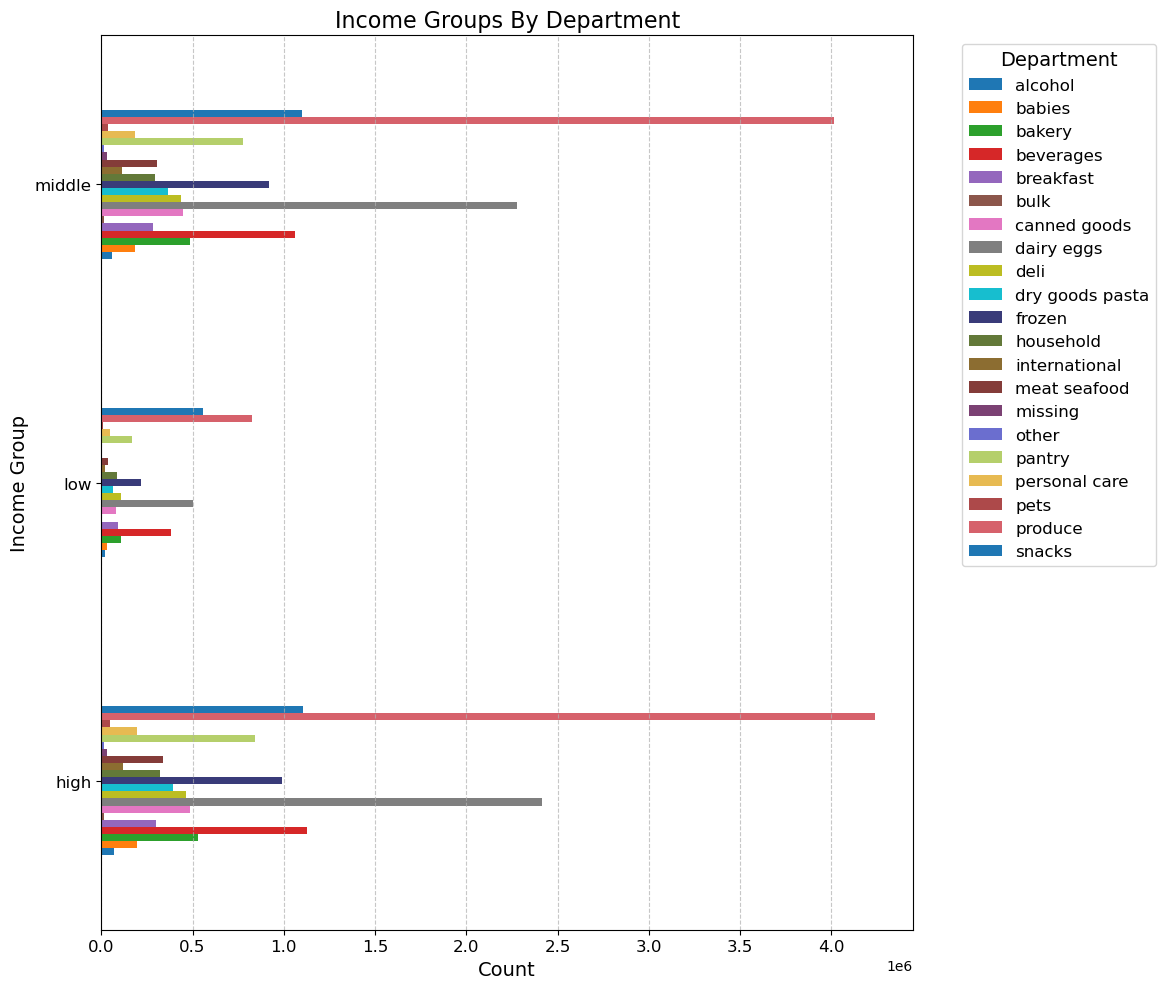

In [126]:
# Define a custom color palette with distinct colors
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#6b6ecf', '#b5cf6b', '#e7ba52', '#ad494a', '#d6616b'
]

# Create a bar chart with custom colors
plt.figure(figsize=(18, 12))
income_group_department_comparison_bar = income_group_department_comparison.plot(
    kind='barh', 
    figsize=(14, 10), 
    color=custom_colors, 
    rot=0
)

# Add title and labels with larger font size
plt.title('Income Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Income Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [127]:
# Exporting Income Groups By Department Comparison Bar Chart
income_group_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','income_group_department_comparison_bar.png'))

# 8.9 Profile of department sales by region

In [128]:
# Creating crosstab to compare regions with departments
region_department_comparison=pd.crosstab(instacart_project['region'],instacart_project['department_x'],dropna=False)

<Figure size 2000x2500 with 0 Axes>

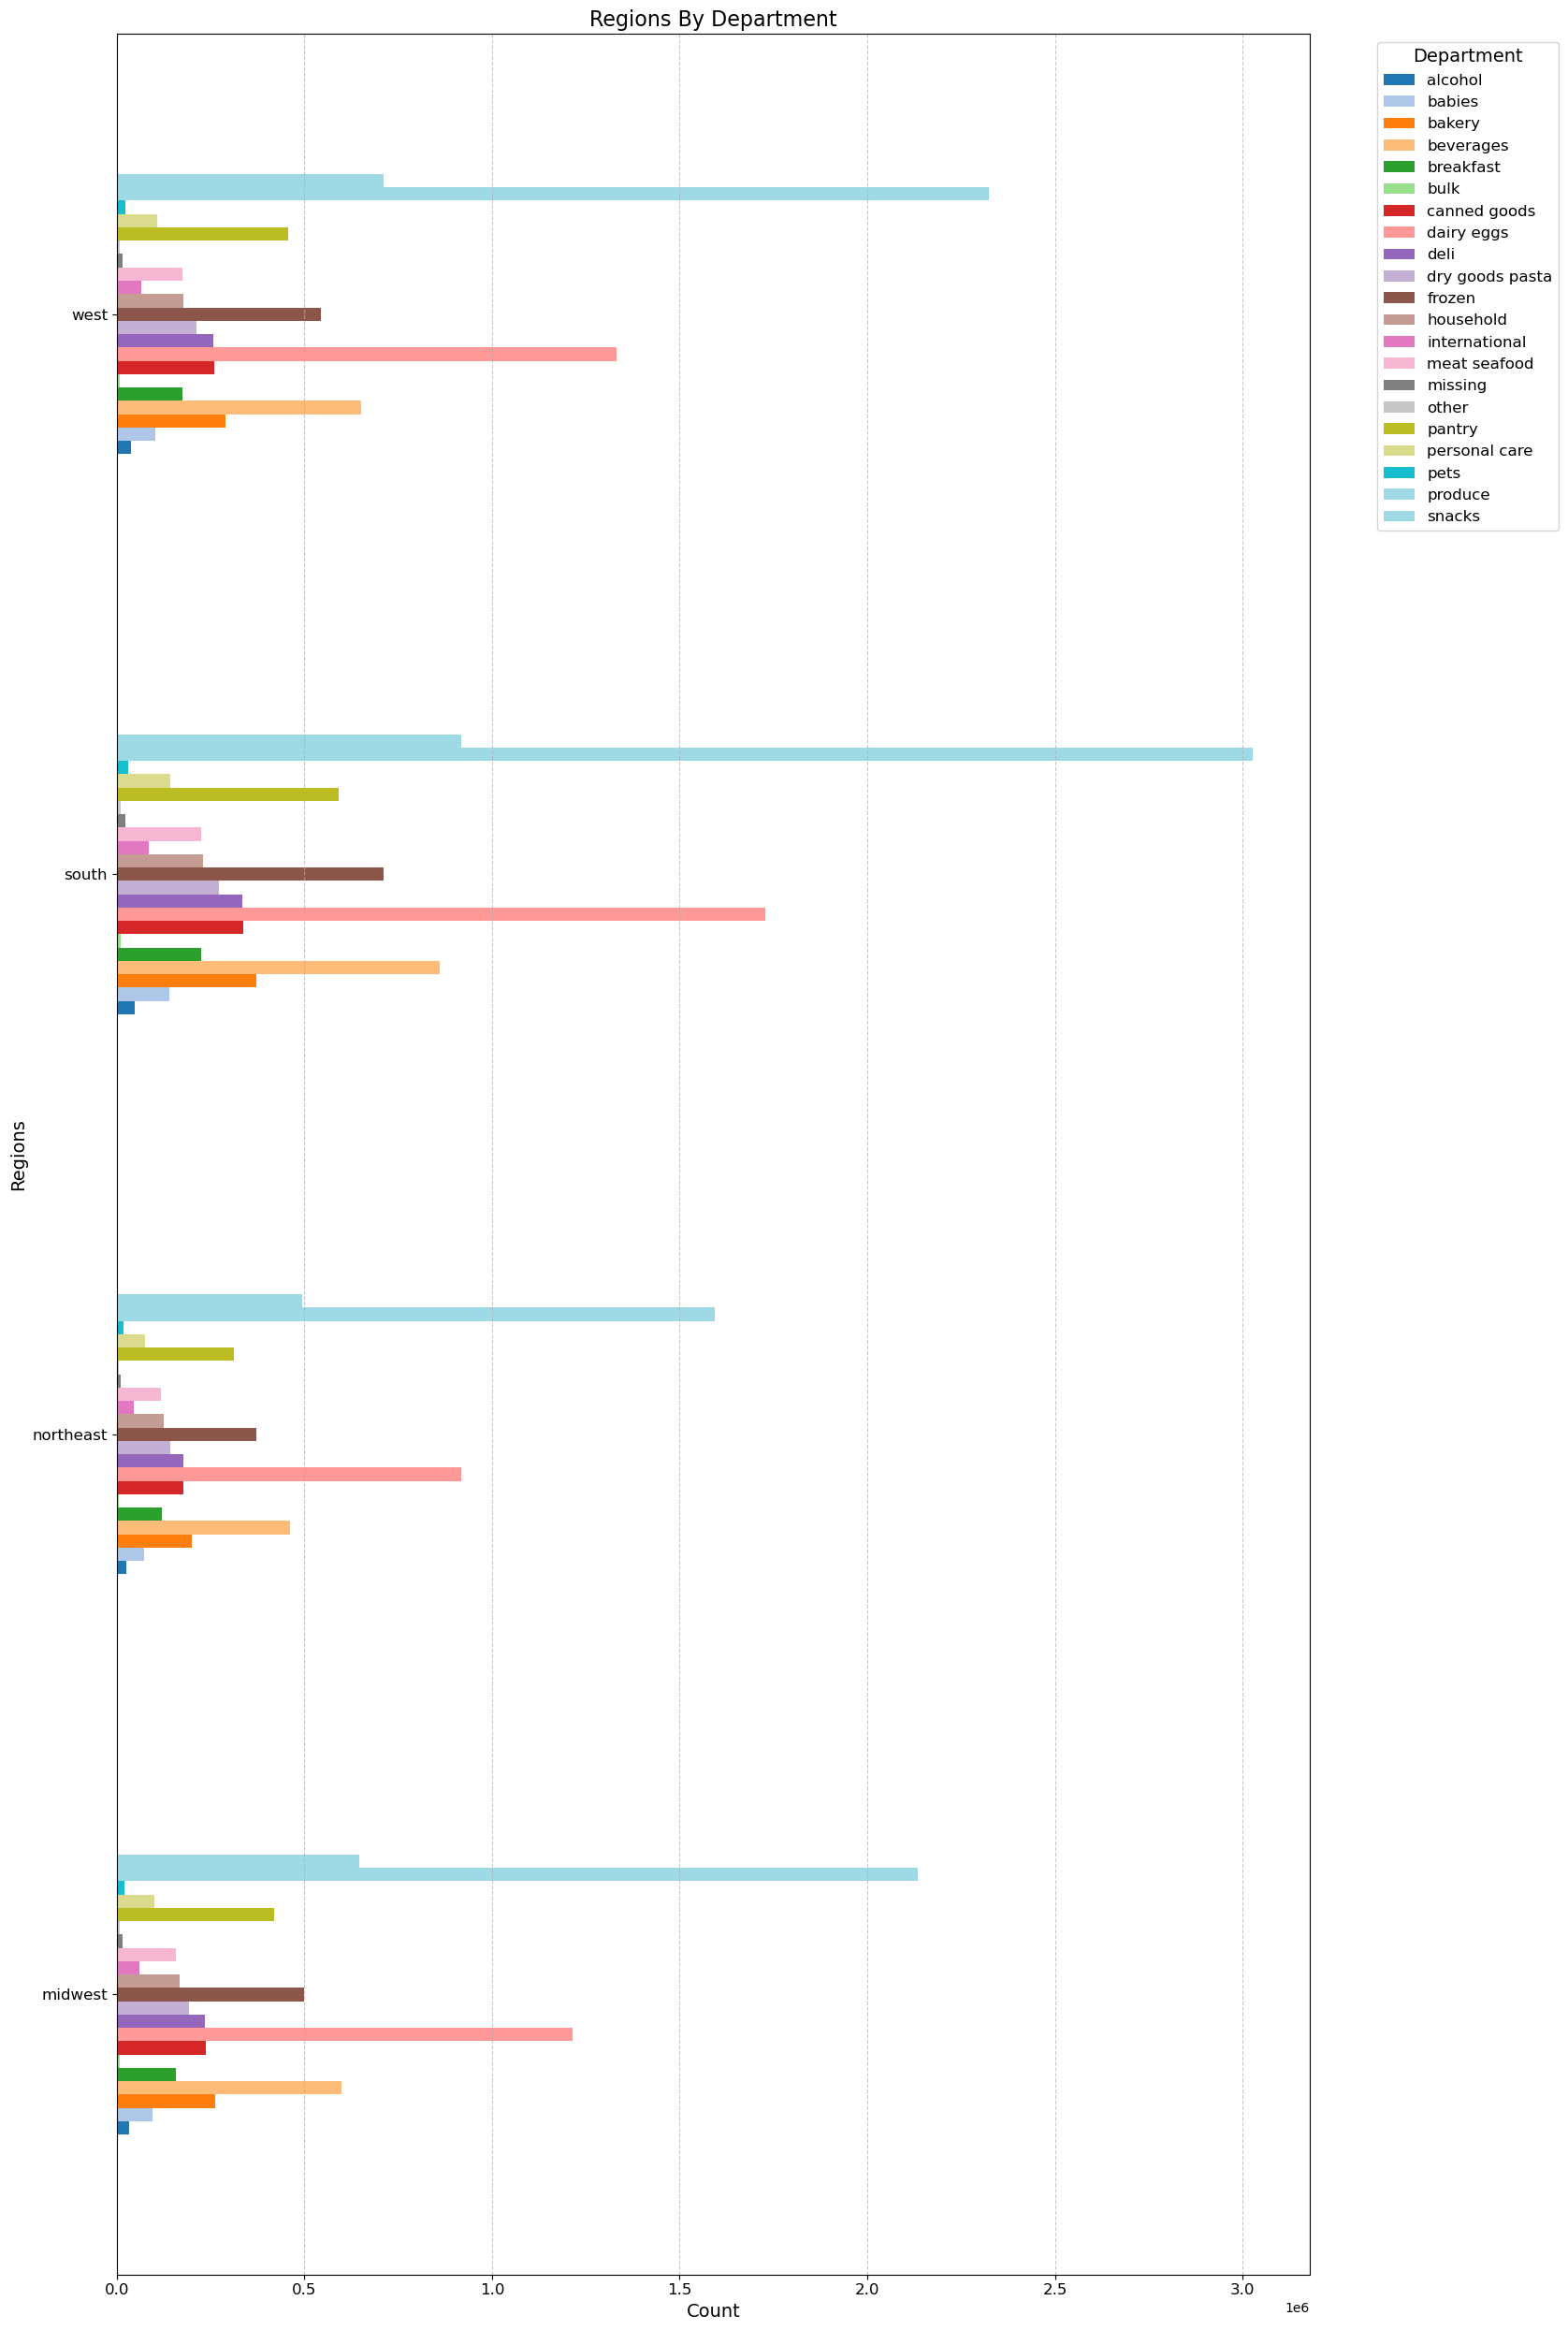

In [129]:
plt.figure(figsize=(20, 25))
region_department_comparison_bar = region_department_comparison.plot(kind='barh', figsize=(20, 25), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [130]:
# Exporting Regions by Department Bar Chart
region_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','region_department_comparison_bar.png'))

# 8.10 Additional Graphs for Project Analysis

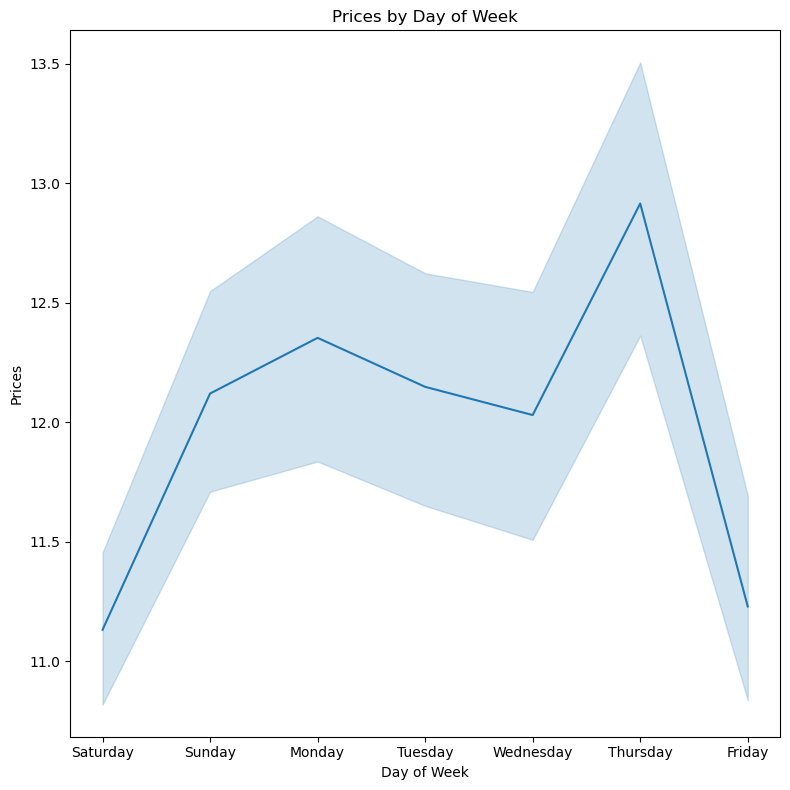

In [133]:
# Creating reference day names
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Creating Line Chart
plt.figure(figsize=(8, 8))
prices_by_day_of_week_line=sns.lineplot(data=instacart_project,x='orders_day_of_week',y='prices')
plt.title('Prices by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Prices')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [135]:
prices_by_day_of_week_line.figure.savefig(os.path.join(path,'04 Analysis','prices_by_day_of_week_line.png'))

# Top 10 departments for Instacart_project

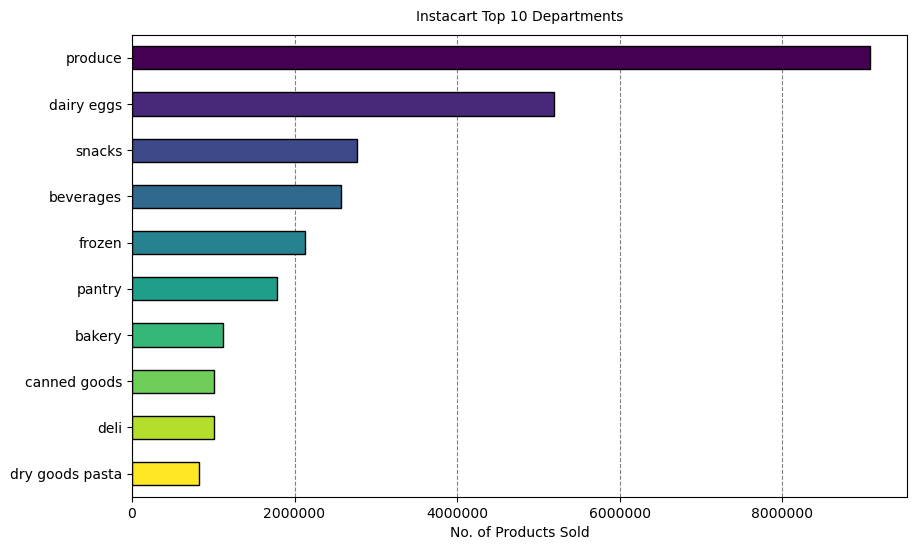

In [136]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

instacart_project['department_x'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, zorder = 2, edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path, '04 Analysis', 'Instacart_department_sales.png'), bbox_inches = 'tight')

# Total orders by region

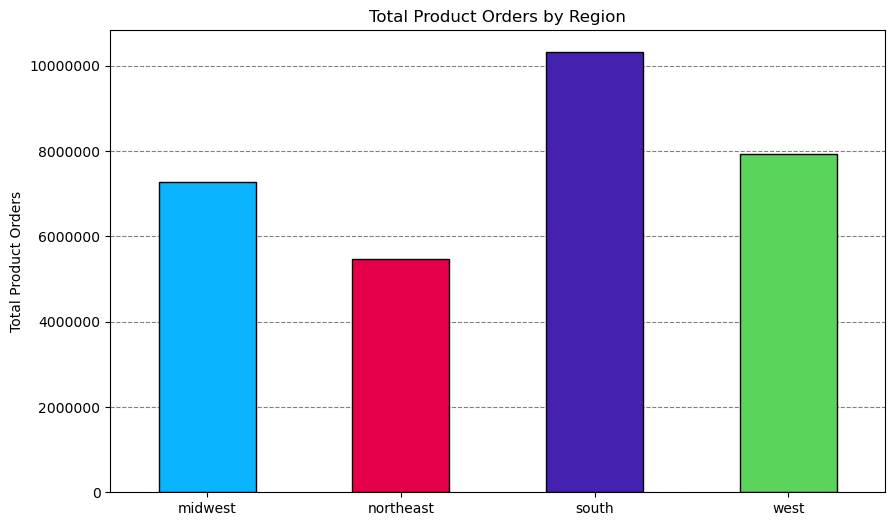

In [137]:
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
instacart_project['region'].value_counts().sort_index().plot.bar(color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],edgecolor='black', zorder=2, alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'instacart_total_orders_by_region.png'), bbox_inches = 'tight')

# Product Prices and Pricing Categories

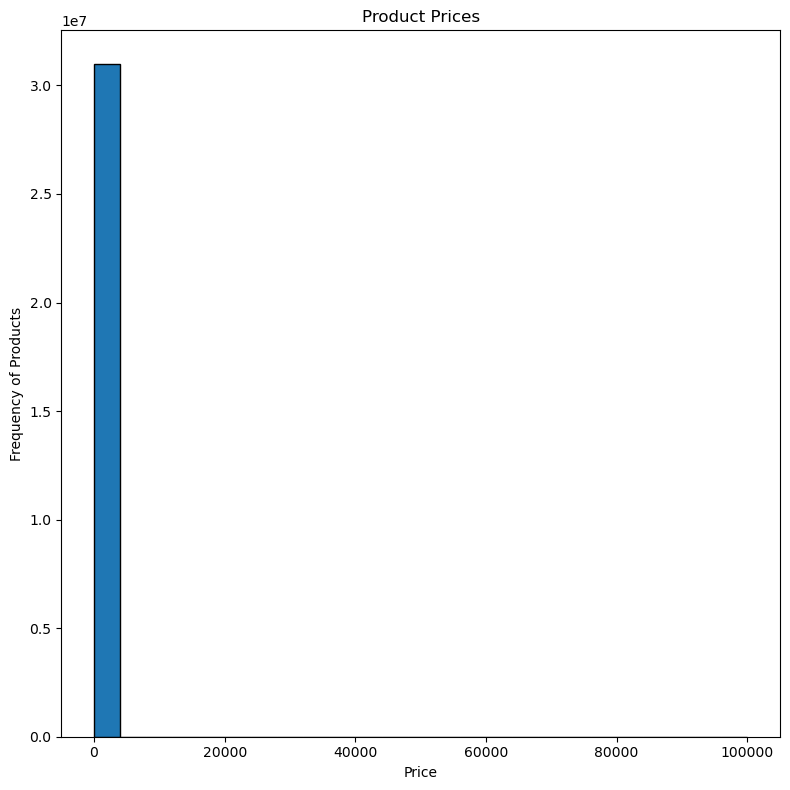

In [138]:
# Histogram of product prices
plt.figure(figsize=(8, 8))
prod_price_hist=instacart_project['prices'].plot.hist(bins=25,edgecolor='black')
plt.title('Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency of Products')
plt.tight_layout()
plt.show()

In [139]:
# Exporting Product Pricing Histogram
prod_price_hist.figure.savefig(os.path.join(path,'04 Analysis','prod_price_hist.png'), bbox_inches='tight')

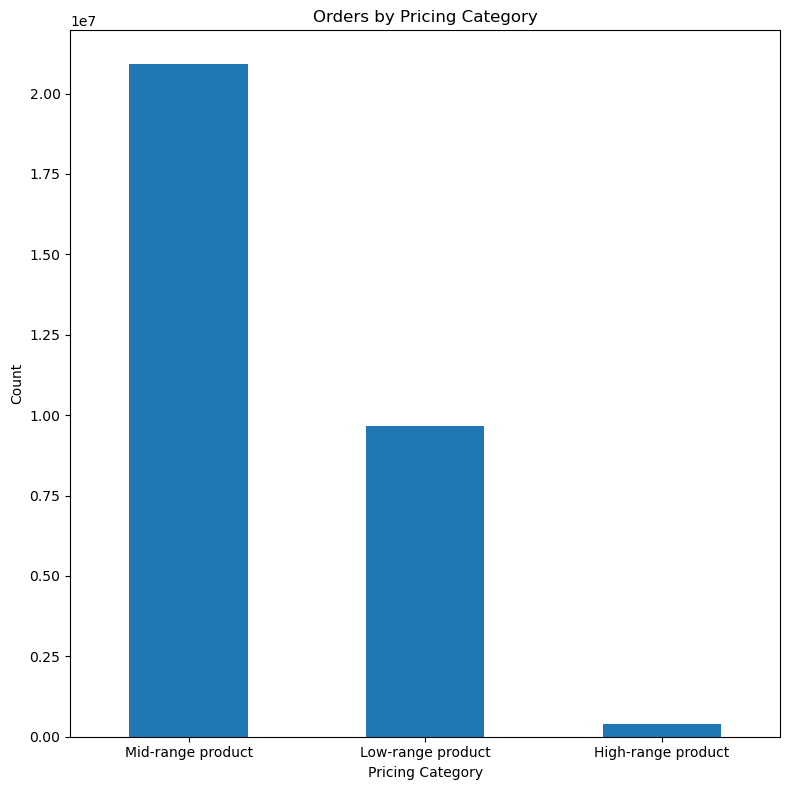

In [140]:
# Creating bar chart for price category
plt.figure(figsize=(8,8))
price_category_bar= instacart_project['price_range_loc'].value_counts().plot(kind='bar', rot=0)
plt.title('Orders by Pricing Category')
plt.xlabel('Pricing Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [141]:
# Exporting Pricing Category Bar Chart comparison
price_category_bar.figure.savefig(os.path.join(path,'04 Analysis','price_category_bar.png'), bbox_inches='tight')

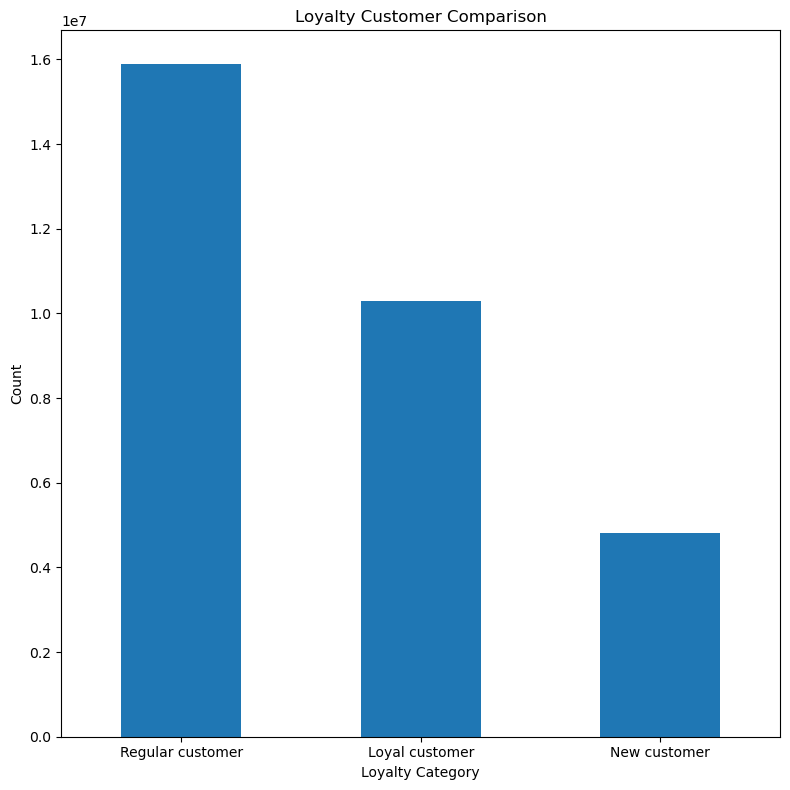

In [142]:
# Creating bar chart for customer loyalty breakdown
plt.figure(figsize=(8,8))
loyalty_customer_comparison_bar= instacart_project['loyalty_flag'].value_counts().plot(kind='bar', rot=0)
plt.title('Loyalty Customer Comparison')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [143]:
# Exporting Loyalty Customer Comparison Bar Chart
loyalty_customer_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','loyalty_customer_comparison_bar.png'), bbox_inches='tight')

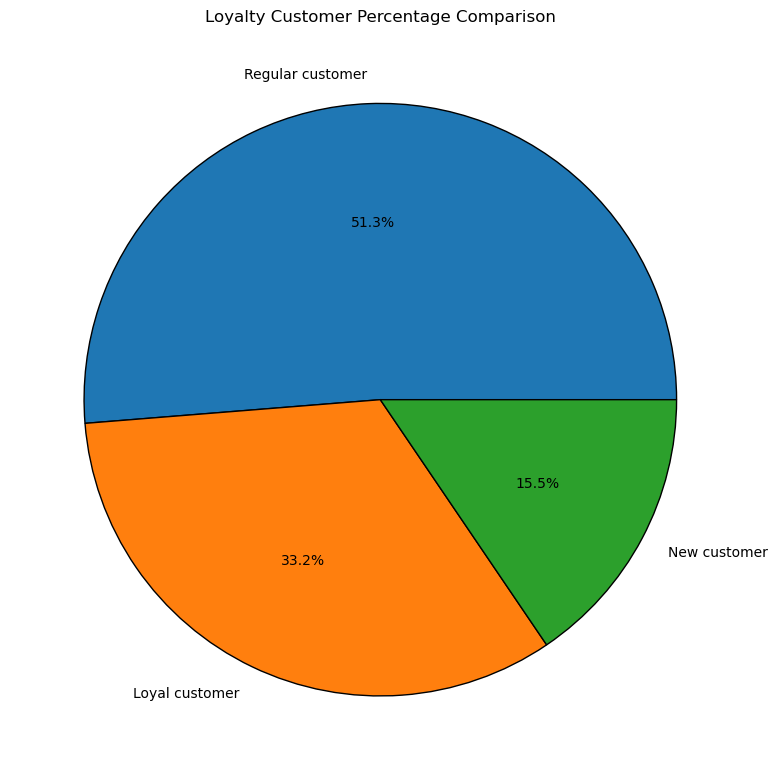

In [144]:
# Creating Pie Chart of customer loyalty breakdown
loyalty_customer_pie= instacart_project['loyalty_flag'].value_counts()
plt.figure(figsize=(8,8))
loyalty_customer_comparison_pie=loyalty_customer_pie.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Loyalty Customer Percentage Comparison')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [145]:
# Exporting Loyalty Customer Comparison Pie Chart
loyalty_customer_comparison_pie.figure.savefig(os.path.join(path,'04 Analysis','loyalty_customer_comparison_pie.png'), bbox_inches='tight')

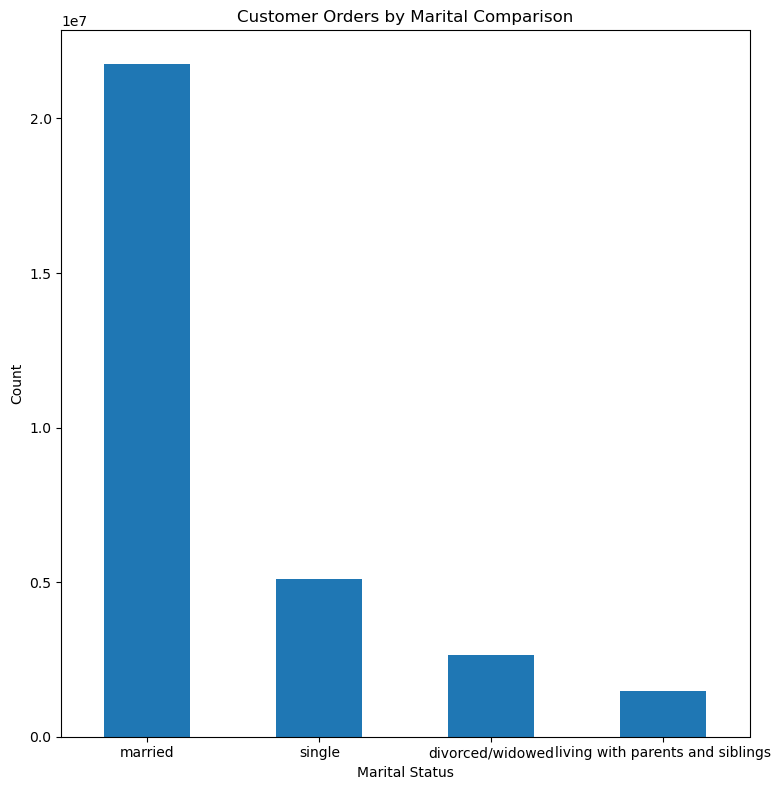

In [146]:
# Creating bar chart for customer marital status breakdown
plt.figure(figsize=(8,8))
marital_status_comparison_bar= instacart_project['marital_status'].value_counts().plot(kind='bar', rot=0)
plt.title('Customer Orders by Marital Comparison')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [147]:
# Export bar chart of customer marital status orders
marital_status_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','marital_status_comparison_bar.png'), bbox_inches='tight')

In [19]:
# Creating crosstab to compare age_group profile with customer frequency type
age_customer_frequency_comparison=pd.crosstab(instacart_project['age_group'],instacart_project['order_frequency'])

<Figure size 1000x700 with 0 Axes>

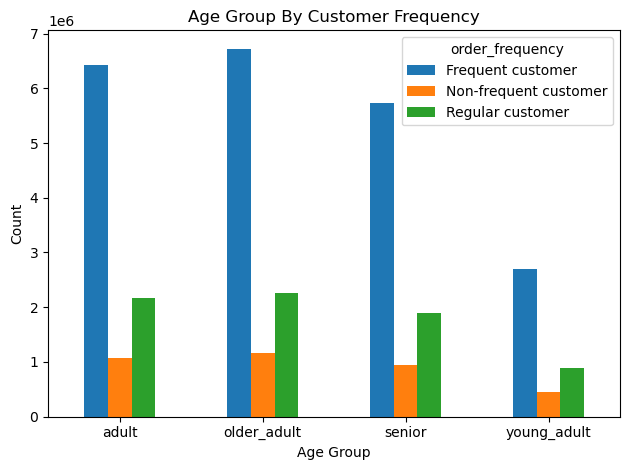

In [20]:
# Creating Bar Chart for age_group By customer frequency Comparison
plt.figure(figsize=(10, 7))
age_customer_frequency_comparison_bar= age_customer_frequency_comparison.plot(kind='bar', rot=0)
plt.title('Age Group By Customer Frequency')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [23]:
# Exporting Age Group By Customer Frequency Bar Chart
age_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','age_customer_frequency_comparison_bar.png'), bbox_inches='tight')

In [24]:
# Creating Crosstab Bewtween age_group and loyalty_flag
age_group_loyalty_comparison=pd.crosstab(instacart_project['age_group'],instacart_project['loyalty_flag'],dropna=False)

<Figure size 2000x2000 with 0 Axes>

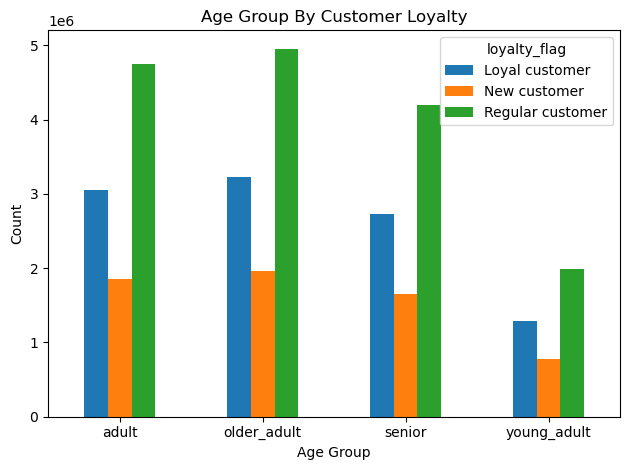

In [25]:
# Creating Bar Chart for age_group By customer loyalty
plt.figure(figsize=(20, 20))
age_group_loaylty_comparison_bar= age_group_loyalty_comparison.plot(kind='bar', rot=0)
plt.title('Age Group By Customer Loyalty')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [26]:
# Exporting age group by customer loyalty chart
age_group_loaylty_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','age_group_loaylty_comparison_bar.png'), bbox_inches='tight')

In [27]:
# Creating crosstab to compare loyalty_flag with type_of_spender
loyalty_type_of_spender_comparison=pd.crosstab(instacart_project['loyalty_flag'],instacart_project['spending_flag'],dropna=False)

<Figure size 0x0 with 0 Axes>

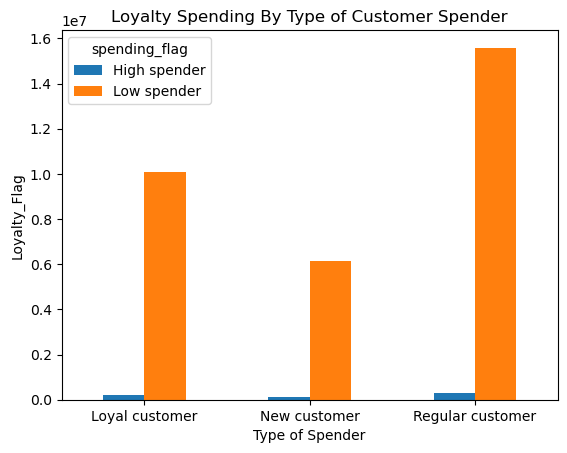

In [28]:
# Creating Bar Chart for Loyalty spending By type of spender
plt.figure(figsize=(0, 0))
loyalty_type_of_spender_comparison_bar= loyalty_type_of_spender_comparison.plot(kind='bar', rot=0)
plt.title('Loyalty Spending By Type of Customer Spender')
plt.xlabel('Type of Spender')
plt.ylabel('Loyalty_Flag')
plt.show()

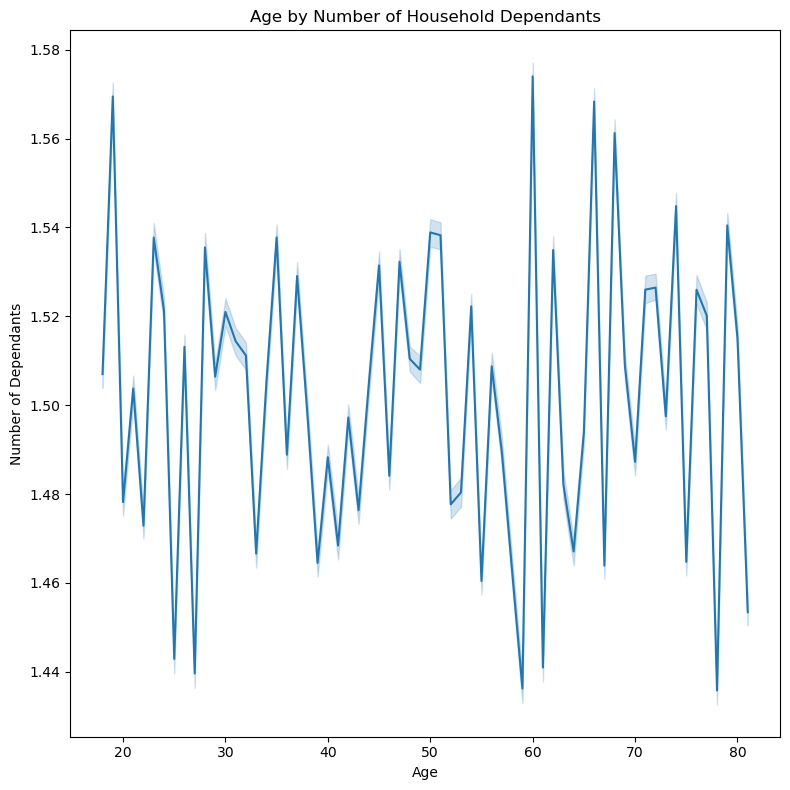

In [29]:
# Creating Line Chart age by num_of_dependants comparison
plt.figure(figsize=(8, 8))
age_by_dependants_line=sns.lineplot(data=instacart_project,x='age',y='n_dependants')
plt.title('Age by Number of Household Dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.tight_layout()
plt.show()

In [30]:
# Exporting line chart age by num_of_dependants comparison
age_by_dependants_line.figure.savefig(os.path.join(path,'04 Analysis','age_by_dependants_line.png'), bbox_inches='tight')

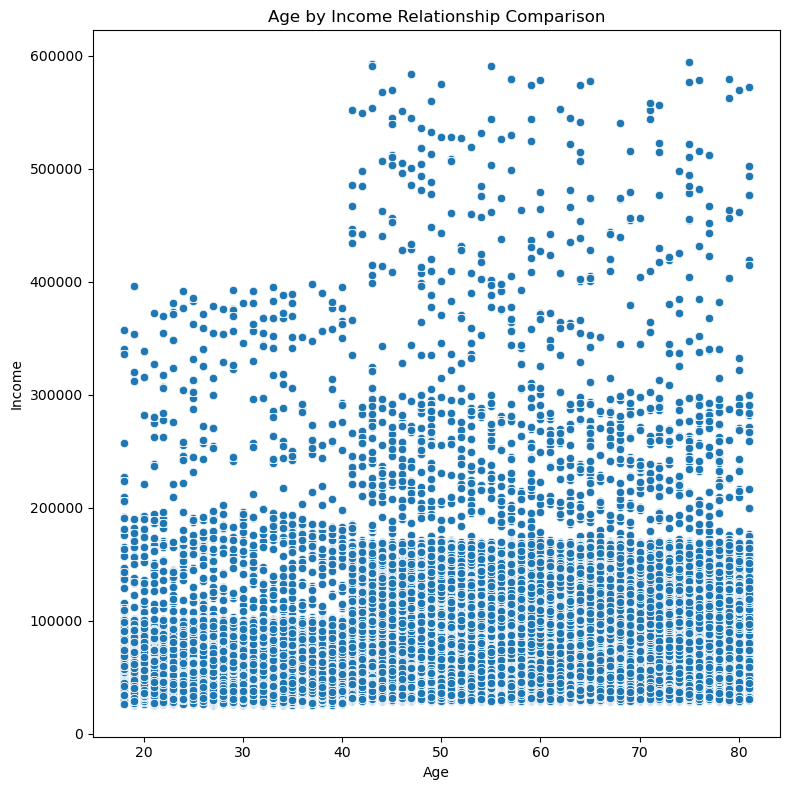

In [34]:
# Creating scatterplot for age by income comparison
plt.figure(figsize=(8, 8))
age_income_comparison_scat=sns.scatterplot(x = 'age', y = 'income',data = instacart_project)
plt.title('Age by Income Relationship Comparison')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

In [36]:
# Exporting scatterplot age by income comparison
age_income_comparison_scat.figure.savefig(os.path.join(path,'04 Analysis','age_income_comparison_scat.png'))